<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/1009_kruskal_klusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [11]:
X, y = make_circles(n_samples=100, factor=0.3, noise=0.05, random_state=0)

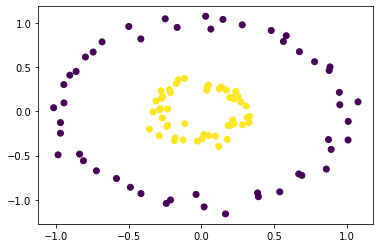

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [9]:
!curl -O https://raw.githubusercontent.com/lmcanavals/acomplex/main/disjointset.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   602  100   602    0     0   1941      0 --:--:-- --:--:-- --:--:--  1948


In [18]:
from disjointset import DisjointSet
import numpy as np
import math

In [31]:
def kruskal(G, k=2):
    n = len(G)
    ds = DisjointSet(n)
    edges = [(G[u, v], u, v) for u in range(n) for v in range(n)]
    edges.sort()
    #T = []
    links = 0
    for _, u, v in edges:
        if not ds.sameset(u, v):
            #T.append((u, v))
            ds.union(u, v)
            links += 1
        if links == n - k: break

    y_ = np.zeros((n), dtype=int)
    unique = set()
    for u in range(n):
        unique.add(ds.find(u))
        y_[u] = ds.find(u)

    for i, u in enumerate(unique):
        y_[y_ == u] = i
    
    return y_

In [15]:
def dist(a, b):
    s = 0
    for x0, x1 in zip(a, b):
        s += (x0 - x1)**2

   return s**0.5

In [19]:
n = len(X)
G = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            G[i, j] = math.inf
        else:
            G[i, j] = dist(X[i], X[j])

print(G)

[[       inf 0.99769016 1.95132367 ... 1.08639589 1.8561462  1.74116841]
 [0.99769016        inf 1.04771357 ... 0.53450837 0.85960321 0.79001373]
 [1.95132367 1.04771357        inf ... 0.91229254 0.53891985 0.96255503]
 ...
 [1.08639589 0.53450837 0.91229254 ...        inf 1.0231521  1.16403616]
 [1.8561462  0.85960321 0.53891985 ... 1.0231521         inf 0.43802603]
 [1.74116841 0.79001373 0.96255503 ... 1.16403616 0.43802603        inf]]


In [36]:
y_ = kruskal(G, k=2)

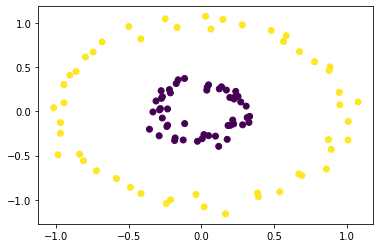

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y_, cmap="viridis")